In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

from keckdata import KeckData, KeckDataList, fits_reader, analysis

%matplotlib inline
from matplotlib import pyplot as plt

/Users/jwalawender/anaconda/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


In [2]:
## HIRES
# p_2019oct11 = Path('/Volumes/JOSHW/HIRES/2019oct11')
# files = sorted([f for f in p_2019oct11.glob('*fits')])
# p_2019oct12 = Path('/Volumes/JOSHW/HIRES/2019oct12')
# files.extend( sorted([f for f in p_2019oct12.glob('*fits')]) )
# kdl_biasesdarks = KeckDataList(files, verbose=False)
# p_2019oct19 = Path('/Volumes/JOSHW/HIRES/2019oct19')
# files = sorted([f for f in p_2019oct19.glob('hires*.fits')])
# kdl_flats = KeckDataList(files, verbose=False)

In [3]:
## MOSFIRE
p_darks = Path('/Volumes/JOSHW/MOSFIRE_Darks/2019oct29')
files = sorted([f for f in p_darks.glob('m*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)
kdl_biasesdarks.len

41

In [4]:
for frame in kdl_biasesdarks.frames:
    if frame.type() == 'BIAS':
        print(frame.filename(), frame.pixeldata[0].data.mean())

m191029_0001.fits -36.6827
m191029_0002.fits -32.6377
m191029_0003.fits -31.6503
m191029_0004.fits -31.8553
m191029_0005.fits -36.9383
m191029_0006.fits -36.2607
m191029_0024.fits -35.1824
m191029_0025.fits -33.9524
m191029_0026.fits -34.1434
m191029_0027.fits -34.5717
m191029_0028.fits -34.1084
m191029_0029.fits -34.4193
m191029_0030.fits -34.2039
m191029_0031.fits -32.6351
m191029_0032.fits -34.5549
m191029_0033.fits -33.8072


In [5]:
for frame in kdl_biasesdarks.frames:
    if frame.type() == 'DARK':
        print(frame.filename(), frame.pixeldata[0].data.mean())

m191029_0008.fits 7.76171
m191029_0009.fits 8.90487
m191029_0010.fits 8.4605
m191029_0011.fits 8.71073
m191029_0012.fits 13.3695
m191029_0013.fits 13.5939
m191029_0014.fits 15.4492
m191029_0015.fits 10.7948
m191029_0016.fits 10.7278
m191029_0017.fits 15.0667
m191029_0018.fits 15.01
m191029_0019.fits 15.233
m191029_0020.fits 14.5273
m191029_0021.fits 13.262
m191029_0022.fits 12.5923
m191029_0034.fits 4.1302
m191029_0035.fits 5.36794
m191029_0036.fits 10.4332
m191029_0037.fits 10.7084
m191029_0038.fits 12.6224
m191029_0039.fits 8.84014
m191029_0040.fits 9.42328
m191029_0041.fits 8.7447
m191029_0042.fits 4.25531
m191029_0043.fits 6.44901


In [6]:
mb = analysis.make_master_bias(kdl_biasesdarks)

2019-10-28 11:54:51     INFO: Making master bias from 16 frames
2019-10-28 11:54:51     INFO: Making master bias for each of 1 extensions
2019-10-28 11:55:04     INFO:   Done


In [7]:
mb.pixeldata[0].data.mean()

-34.22522822022438

In [8]:
RN = analysis.determine_read_noise(kdl_biasesdarks, master_bias=mb, plot=False, trim=100)

2019-10-28 11:55:04     INFO: Determining read noise
2019-10-28 11:55:04     INFO:   Checking that all inputs are BIAS frames
2019-10-28 11:55:04     INFO:   Found 16 biases
2019-10-28 11:55:04     INFO: Making master bias from 15 frames
2019-10-28 11:55:04     INFO: Making master bias for each of 1 extensions
2019-10-28 11:55:15     INFO:   Done
2019-10-28 11:55:16     INFO:   Determining read noise for each of 1 extensions
2019-10-28 11:55:20     INFO:   Read Noise is 10.29 adu for extension 1


In [9]:
RN

<Quantity [ 10.28577467] adu>

2019-10-28 11:55:20     INFO: Determining dark current
2019-10-28 11:55:20     INFO:   Found 25 dark frames
2019-10-28 11:55:20     INFO:   Determining dark current for each of 1 extensions
2019-10-28 11:56:42     INFO:   Obtained statistics for frames with 5 different exposure times
2019-10-28 11:56:42     INFO:   Determining dark current from
2019-10-28 11:56:42     INFO:     5 2 second darks
2019-10-28 11:56:42     INFO:     5 7 second darks
2019-10-28 11:56:42     INFO:     5 29 second darks
2019-10-28 11:56:42     INFO:     5 88 second darks
2019-10-28 11:56:42     INFO:     5 178 second darks
2019-10-28 11:56:42     INFO:   Dark Current is -0.011 adu / s for extension 1
2019-10-28 11:56:42     INFO:   Generating plot for dark current for frame 0
2019-10-28 11:56:42     INFO:   Generating dark current plot: dark_current_ext0_2019-10-28T203934.76.png


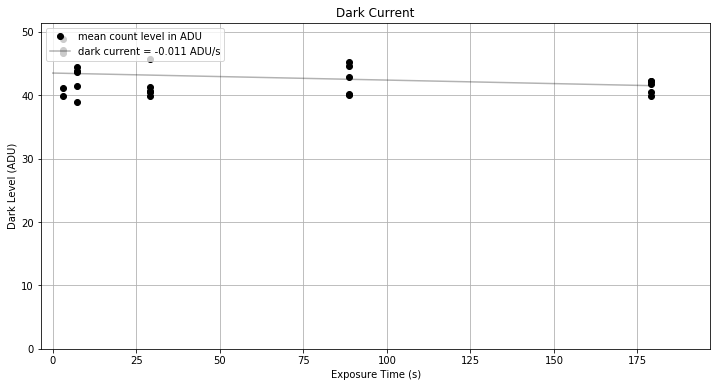

In [10]:
DC = analysis.determine_dark_current(kdl_biasesdarks, master_bias=mb, plot=True, trim=100, nozero=True, usemedian=True)

In [11]:
DC

<Quantity [-0.0110922] adu / s>

In [12]:
# g = analysis.determine_gain(kdl_flats, master_bias=mb, read_noise=RN, plot=True)

In [13]:
# g